In [180]:
import numpy as np

In [181]:
import pandas as pd

In [182]:
# read from csv file
df = pd.read_csv('/Users/santoshpandey/Documents/Santosh/spam_classifer/spam_detection/spam.csv', encoding='latin-1')

In [183]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3768,ham,Was gr8 to see that message. So when r u leavi...,NaN,NaN,NaN
906,spam,"all the lastest from Stereophonics, Marley, Di...",NaN,NaN,NaN
282,ham,Ok. I asked for money how far,NaN,NaN,NaN
898,ham,"Thursday night? Yeah, sure thing, we'll work i...",NaN,NaN,NaN
3479,ham,What was she looking for?,NaN,NaN,NaN


In [184]:
# Drop last 3 columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [185]:
# Renaming columns
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [186]:
df.sample(5)

,target,text
2453,ham,How much she payed. Suganya.
3714,ham,"I am late,so call you tomorrow morning.take ca..."
1501,spam,HOT LIVE FANTASIES call now 08707509020 Just 2...
5035,spam,You won't believe it but it's true. It's Incre...
1114,ham,No no:)this is kallis home ground.amla home to...


In [187]:
!pip3 install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [188]:
from sklearn.preprocessing import LabelEncoder

In [189]:
encoder = LabelEncoder()

In [190]:
df['target'] = encoder.fit_transform(df['target'])

In [191]:
df.sample(5)

,target,text
127,0,Are you there in room.
731,0,No he didn't. Spring is coming early yay!
159,1,You are a winner U have been specially selecte...
4871,0,Hi dis is yijue i would be happy to work wif Ì...
4634,0,How come i din c Ì_... Yup i cut my hair...


In [192]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [193]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [194]:
df.duplicated().sum()

403

In [195]:
df = df.drop_duplicates(keep='first')

In [196]:
df.duplicated().sum()

0

In [197]:
df.shape

(5169, 2)

In [198]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [199]:
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


([<matplotlib.patches.Wedge at 0x15786b850>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

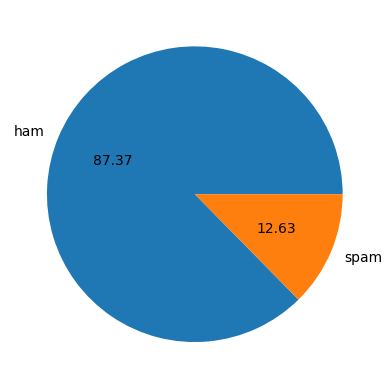

In [200]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")

In [201]:
!pip install nltk


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [202]:
import nltk

In [203]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/santoshpandey/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [204]:
df['num_characters'] = df['text'].apply(len)

In [205]:
df.sample(5)

,target,text,num_characters
144,0,Yes see ya not on the dot,25
3423,1,Am new 2 club & dont fink we met yet Will B gr...,161
1521,0,Are you angry with me. What happen dear,39
5018,0,Great! How is the office today?,31
2493,0,they released another Italian one today and it...,66


In [206]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [207]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [208]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [209]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [210]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [211]:
!pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [212]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

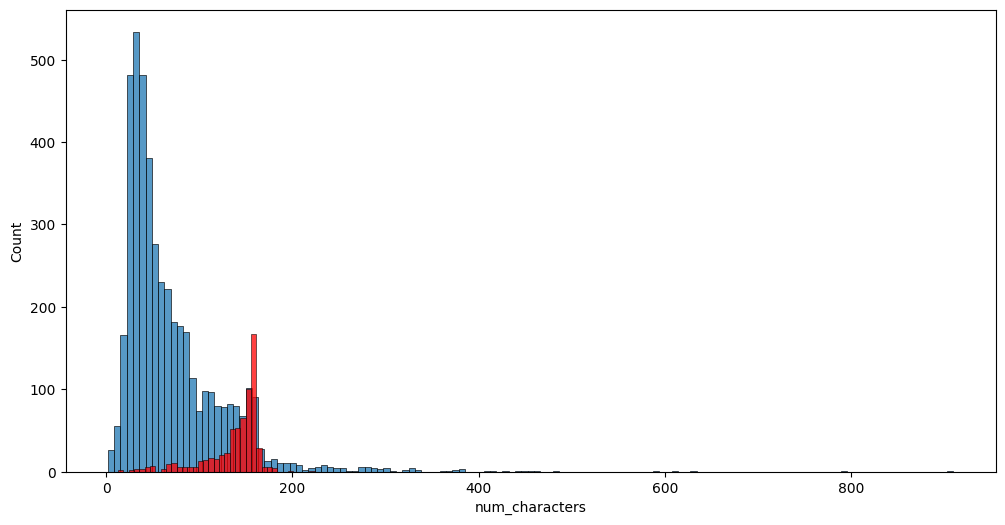

In [213]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

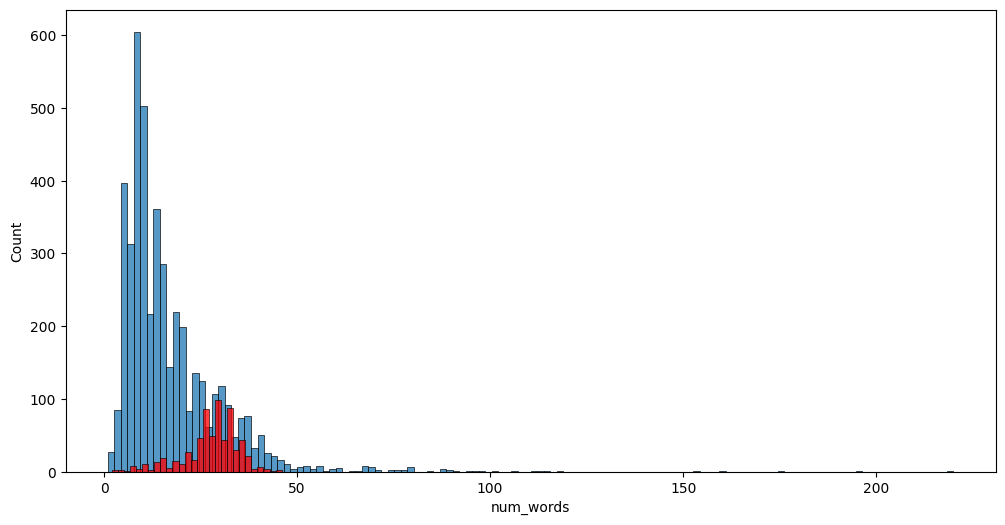

In [214]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

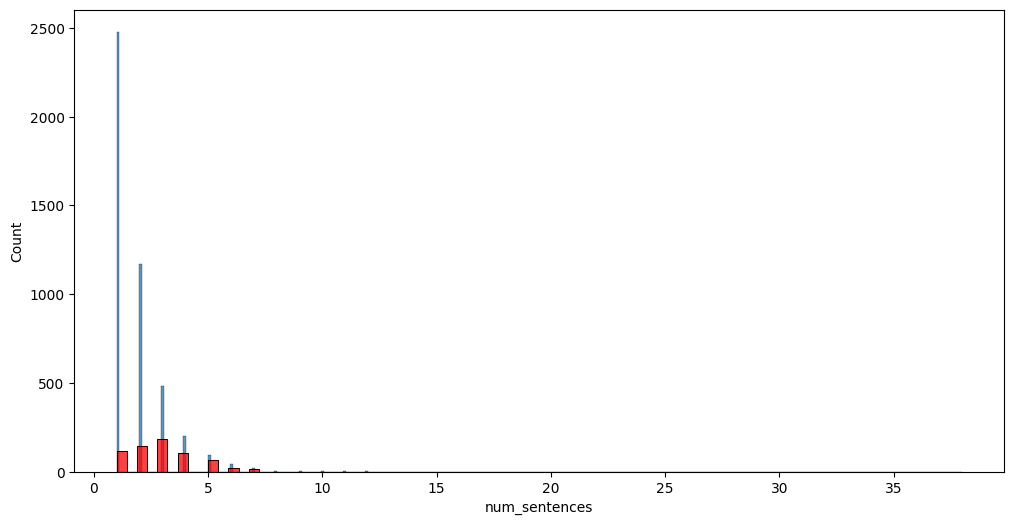

In [215]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'], color='red')

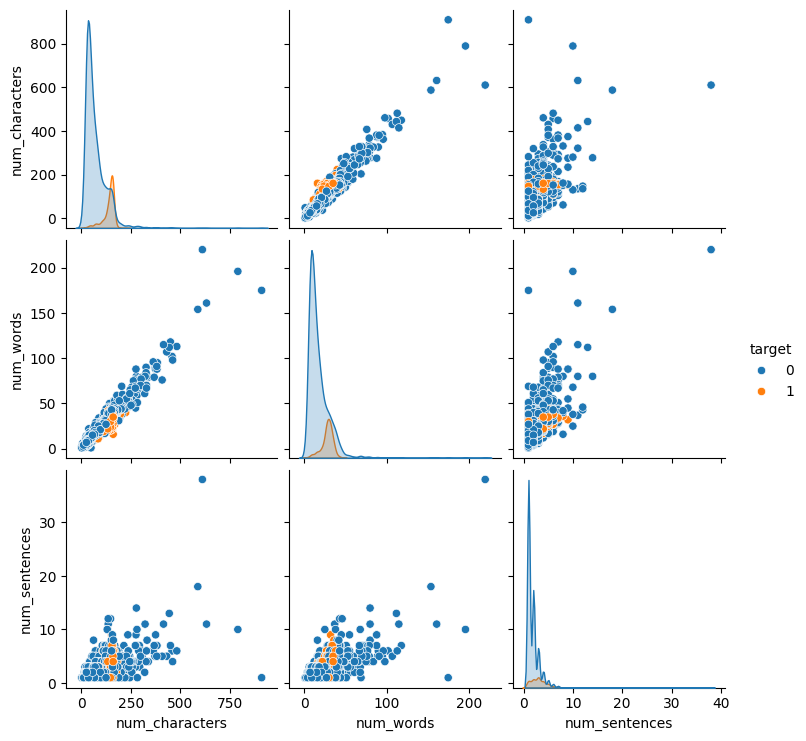

In [216]:
sns.pairplot(df, hue='target')

In [217]:
# Data Preprocessing
# 1. LowerCase
# 2. Tokenization
# 3. Remove special characters
# 4. Remove stop words and punctuation
# 5. Stemming

In [218]:
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/santoshpandey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [219]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    filter_words = []
    for word in text:
        if word.isalnum():
            filter_words.append(word)

    result = []
    for word in filter_words:
        if word not in stopwords.words('english') and word not in string.punctuation:
            result.append(ps.stem(word))

    return " ".join(result)

In [220]:
df['transformed_text'] = df['text'].apply(transform_text)

In [221]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [222]:
!pip install wordcloud


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


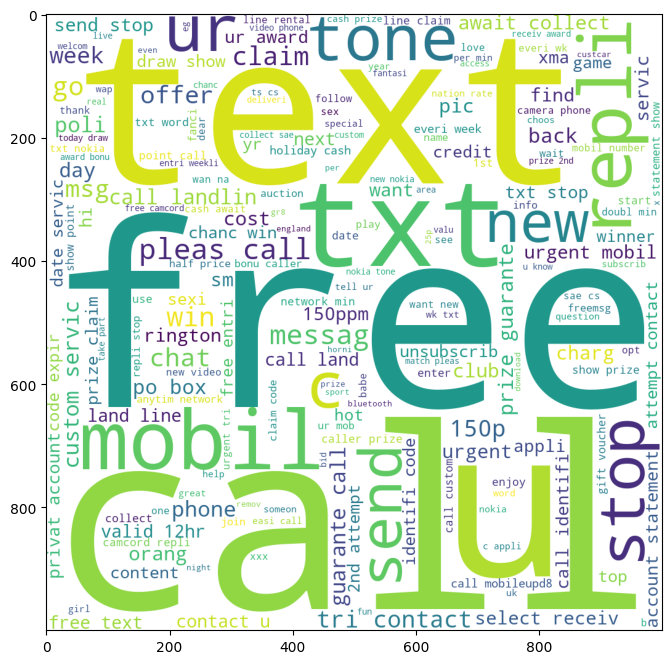

In [223]:
from wordcloud import WordCloud
wc = WordCloud(width=1000, height=1000, min_font_size=10, background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(15, 8))
plt.imshow(spam_wc)

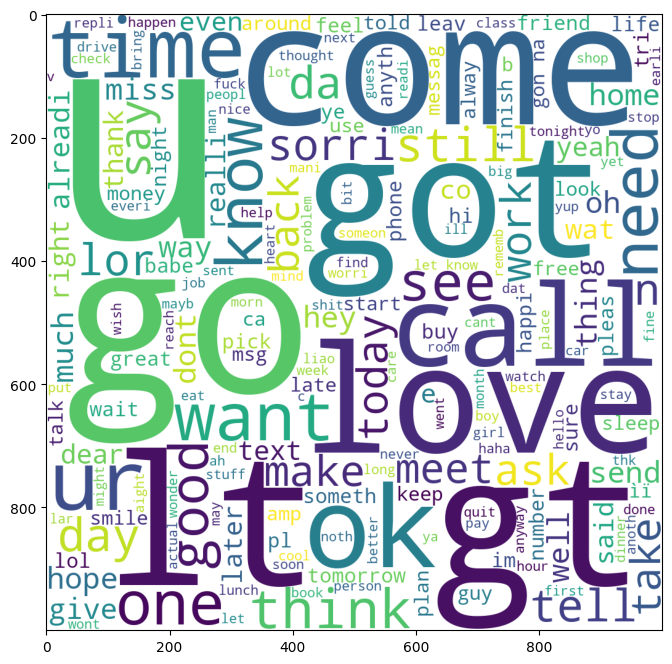

In [224]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15, 8))
plt.imshow(ham_wc)

In [225]:
# Model Building

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

X = tfidf.fit_transform(df['transformed_text']).toarray()
Y = df['target'].values

In [226]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [227]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

gnb.fit(X_train, Y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test, y_pred1))
print(confusion_matrix(Y_test, y_pred1))
print(precision_score(Y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [228]:
mnb.fit(X_train, Y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test, y_pred2))
print(confusion_matrix(Y_test, y_pred2))
print(precision_score(Y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [229]:
bnb.fit(X_train, Y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test, y_pred3))
print(confusion_matrix(Y_test, y_pred3))
print(precision_score(Y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [230]:
!pip install xgboost


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [231]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [232]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [233]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [234]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [235]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,Y_train,X_test,Y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.8173076923076923
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [236]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [237]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [238]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [239]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


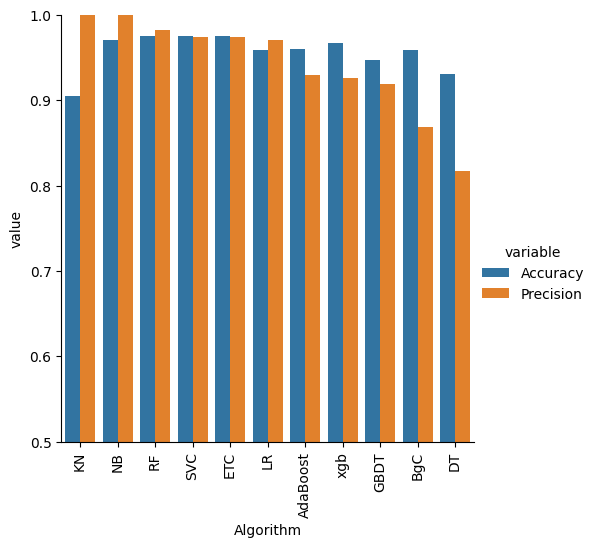

In [240]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [241]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))